# Simple image operations

In [120]:
# find out current directory
!pwd

/Users/hozak/git/python-solar


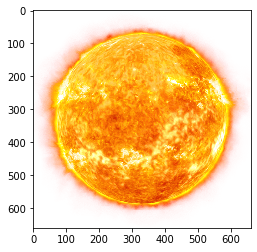

In [125]:
# tutorial in https://matplotlib.org/3.1.1/tutorials/introductory/images.html
# png downloaded from https://www.stickpng.com/img/nature/space/sun/burning-sun

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im

img = im.imread('sun.png') # must be in current directory (or use abs path)
plt.imshow(img)
plt.savefig('sun2.png')

In [20]:
print('height:', len(img), ' width:', len(img[0]))

height: 660  width: 660


In [127]:
img[330]

array([[1.        , 0.        , 0.        , 0.00784314],
       [1.        , 0.        , 0.        , 0.01176471],
       [1.        , 0.        , 0.        , 0.01176471],
       ...,
       [1.        , 0.        , 0.        , 0.00784314],
       [1.        , 0.        , 0.        , 0.00392157],
       [1.        , 0.        , 0.        , 0.00392157]], dtype=float32)

In [131]:
a = [1, 2, 3]
print(a)
print(1, 2, 3)
print(*a)

[1, 2, 3]
1 2 3
1 2 3


In [134]:
def sum(x, y):
    return x + y
a = 1
b = 2
sum(a, b)
both = [1, 2]
sum(*both)

3

In [139]:
a = [[1, 2],
     [3, 4],
     [5, 6]]
expected = [[1, 3, 5],
            [2, 4, 6]]

# zip([1,2], [3,4], [5,6])
result = zip(*a)
printable_result = list(result)
print(printable_result)

[(1, 3, 5), (2, 4, 6)]


In [137]:
first, second = zip(*a)
print(first)
print(second)

(1, 3, 5)
(2, 4, 6)


In [143]:
how_many = zip(*img[330])
len(list(how_many))

4

<BarContainer object of 660 artists>

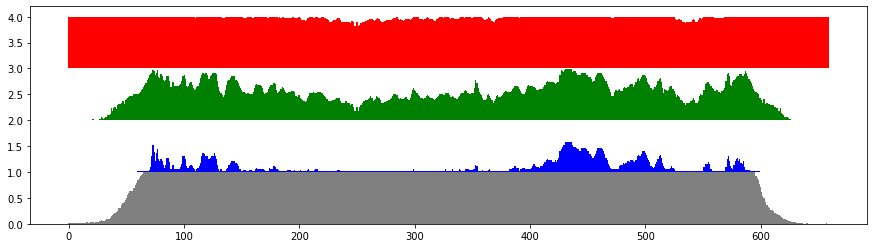

In [145]:
r, g, b, opacity = zip(*img[330])

indexes = list(range(len(r)))
plt.figure(figsize=(15,4))
plt.bar(indexes, r, color="r", width=1, bottom=3)
plt.bar(indexes, g, color="g", width=1, bottom=2)
plt.bar(indexes, b, color="b", width=1, bottom=1)
plt.bar(indexes, opacity, color="gray", width=1)

In [146]:
s = 'Hello'
s[0:2]

'He'

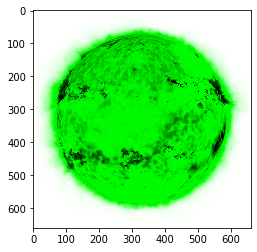

In [152]:
# img2 = img would create a reference to the same array
img2 = np.copy(img)
img2[:, :, 0] = 0
img2[:, :, 1] = 1 - img2[:, :, 2]
img2[:, :, 2] = 0
plt.imshow(img2)

# Matrix operations

In [155]:
# same as using np.array() instead of pd.DataFrame()
a = pd.DataFrame([[1, 2],
                  [3, 4]])
b = pd.DataFrame([[2, 0],
                  [1, 2]])
a

,0,1
0,1,2
1,3,4


In [89]:
a + 2

,0,1
0,3,4
1,5,6


In [85]:
a * 2

,0,1
0,2,4
1,6,8


In [67]:
# * will multiply first column by 1, second by 0
a * [1, 0]

,0,1
0,1,0
1,3,0


In [75]:
a.dot([1, 0])
a @ [1, 0]

0    1
1    3
dtype: int64

In [86]:
# * will multiply each element individually
a * b

,0,1
0,2,0
1,3,8


In [87]:
# a.dot(b)
a @ b

,0,1
0,4,4
1,10,8


In [88]:
# b.dot(a)
b @ a

,0,1
0,2,4
1,7,10


In [156]:
r90 = pd.DataFrame([[ 0, 1],
                    [-1, 0]])
rotated = a @ r90
rotated

,0,1
0,-2,1
1,-4,3


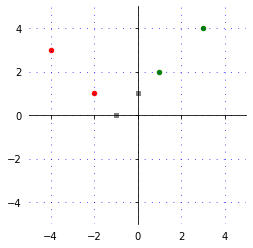

In [165]:
ax = a.plot.scatter(x=0, y=1, color="green", xlim=(-5, 5), ylim=(-5, 5))
rotated.plot.scatter(ax=ax, x=0, y=1, color="red")
r90.plot.scatter(ax=ax, x=0, y=1, color="gray", marker=",")

ax.set_aspect('equal')
ax.grid(True, dashes=(1,8), color="blue")
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.set_xlabel(None)
ax.set_ylabel(None)
for label in ax.xaxis.get_majorticklabels():
    label.set_y(-5)
for label in ax.yaxis.get_majorticklabels():
    label.set_x(-5)

In [94]:
from scipy.ndimage import convolve
convolve(a, b)

array([[12, 14],
       [18, 20]], dtype=int64)

In [415]:
from numpy.linalg import solve

solve(a, [3, 5])

array([-1.,  2.])